# IPND Data Analysis Final Project

## Abstract

**Author:**
Xiaoyu Xing

**Data set:** [TMDb movie data](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv)

**Question to investigate:** 
1. What kinds of properties are associated with movies that have high popularity? Such as: budget, director, runtime, genres, release year, and vote. 
2. How are the budgets, revenues, and profits (revenues - budgets) correlate with release_year and genres?

**Summary of conclusion:**
1. Popularity had a high correlation with vote_count, budget, and revenue; a medium correlation with vote_average.
2. Movies in the last 60s and 70s earned more than these of today.
3. Family, fantasy, scifi, animation, adventure, and action movies showed higher budget, but also got higher revenue and earned higher profits.

## Method and Result

### 1. Load and Clean Up Data

#### Load Data

First, I loaded the csv file as dataframe, then first have look at of it.

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

%matplotlib inline

raw_data = pd.read_csv('tmdb-movies.csv')

In [2]:
# Get familiar with columns
raw_data.columns 

Index([u'id', u'imdb_id', u'popularity', u'budget', u'revenue',
       u'original_title', u'cast', u'homepage', u'director', u'tagline',
       u'keywords', u'overview', u'runtime', u'genres',
       u'production_companies', u'release_date', u'vote_count',
       u'vote_average', u'release_year', u'budget_adj', u'revenue_adj'],
      dtype='object')

In [3]:
# Get familiar with the table
raw_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Dig into the data further to find out "dirty"/unexpeted data
raw_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Clean Up Data

After going throught the above data briefly, I noticed there the minimum value in runtime, budget, budget_adj, revenue, and revenue_adj were 0, which was quite unreasonable. Even though it's said this data was after cleaning, but I believed these entries with unusual 0 numbers should be removed before further exploration due to the low reliability. 

In [5]:
# Replace 0 with NaN and drop them in all entries.
abs_non0_data = raw_data.replace(0, np.nan, inplace = False)
abs_non0_data.dropna(inplace = True)

In [6]:
# Check the data again
abs_non0_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


However, after this processing, the size of sample was reduce a lot. So I decided to create another data set that only removed the entries with the 0 runtime, but keep the entries with 0 budget and revenue.

In [7]:
# Replace 0 with NaN and drop them ONLY in column 'runtime'.
clean_data = raw_data.replace(0, np.nan, inplace = False)
clean_data.dropna(subset = ['runtime'],inplace = True)

In [8]:
# Check the data again
clean_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10835.000000,10835.000000,5.167000e+03,4.850000e+03,10835.000000,10835.000000,10835.000000,10835.000000,5.167000e+03,4.850000e+03
mean,65747.954776,0.647757,3.075510e+07,8.922066e+07,102.362898,217.952100,5.976253,2001.296078,3.690673e+07,1.150774e+08
std,91816.027384,1.001158,3.890649e+07,1.620684e+08,30.946957,576.345266,0.935051,12.819389,4.196174e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10586.500000,0.208561,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.105479e+06,1.046262e+07
50%,20556.000000,0.384763,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.274082e+07,4.392749e+07
75%,75036.000000,0.715444,4.000000e+07,9.991823e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I will use the abs_non0_data for correlation analysis between popularity with budget and revenue, and use the clean_data for other analysis.


#### General Exploration of Data

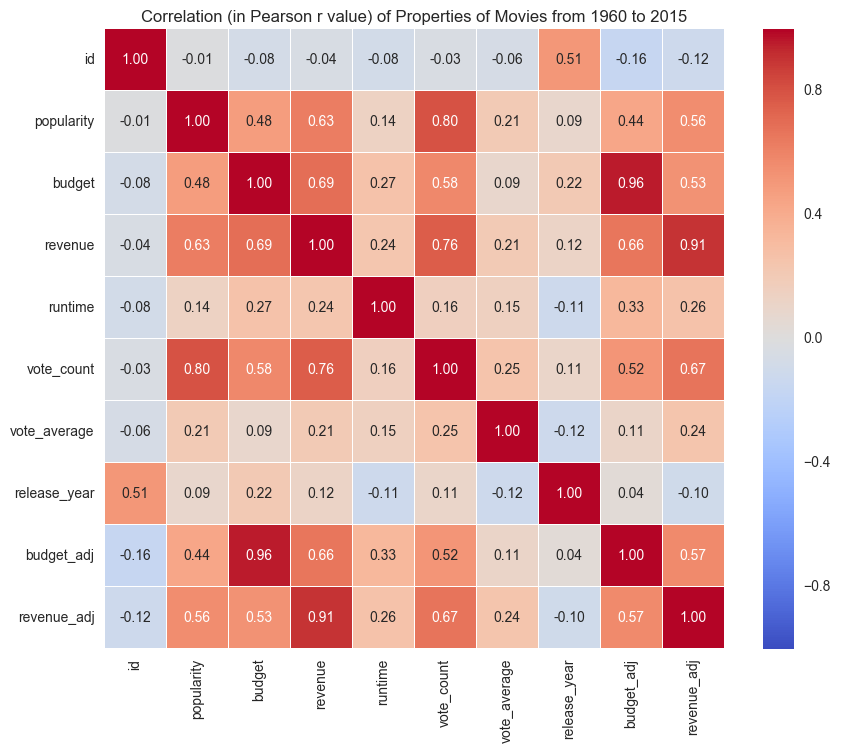

In [9]:
# Get a brief idea of how the popularity (this is what I am interested in) correlated with other factors.
plt.figure(figsize = (10,8))
correlation_map = sns.heatmap(clean_data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01).set_title(
    'Correlation (in Pearson r value) of Properties of Movies from 1960 to 2015')

From the above correlation map, we can see the popularity has a high correlation with vote_count, vote, budget_adj, and revenue_adj. Next, I will explore the correlation of each independent variables with the popularity.

### 2. Furthur Exploration about Popularity

#### Popularity with vote_count

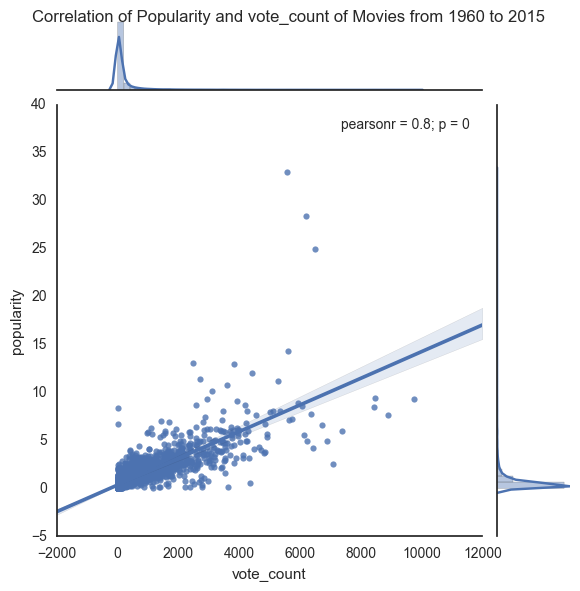

In [10]:
# Use jointplot to show correlation of popularity and vote_count
plt.figure(figsize = (10,10))
sns.set(style="white", color_codes=True)
pop_vote_count_map = sns.jointplot(x="vote_count", y="popularity", data=clean_data, kind="reg")
pop_vote_count_map.fig.suptitle('Correlation of Popularity and vote_count of Movies from 1960 to 2015')

**Conclusion:** Most movies have less than 4000 votes and less than 5 of popularity. But for movies with higher popularity, the votes_count usually higher. And the the pearson r value showed a strong correlation between these two. But we CANNOT conclude the cause and effect reasoning. But it's possible that if a movie is really good, people would like to vote at IMDB, so the popularity will increase.

#### Popularity with vote_average

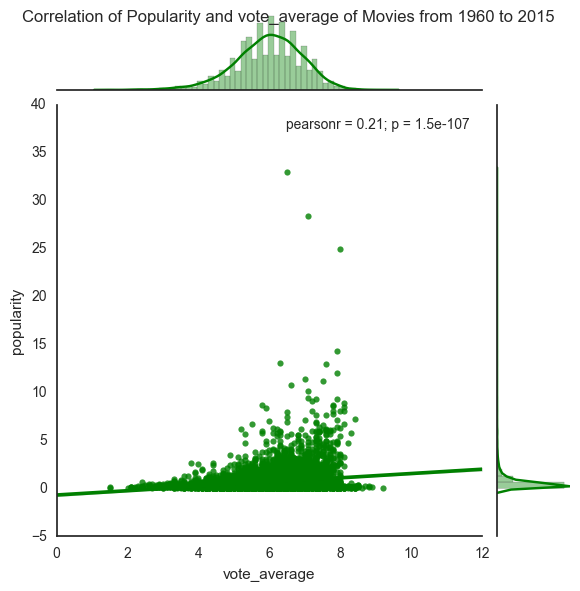

In [11]:
# Use jointplot to show correlation of popularity and vote_average
pop_vote_map = sns.jointplot(x="vote_average", y="popularity", data=clean_data, kind="reg", color='green')
pop_vote_map.fig.suptitle('Correlation of Popularity and vote_average of Movies from 1960 to 2015')

**Conclusion:** We can see movies with higher vote_average score usually have a higher popularity, especially in the range of 6 to 8 in vote_average. For movies in 8 to 10 in vote_average, it seems like these movies can only enjoyed in a small group of people. Though their high votes, the popularity is still low.

#### Popularity with budget_adj

This graph was made from the abs_non0_data, where the 0 entries in budget_adj and revenue_adj were removed for a better reliability.

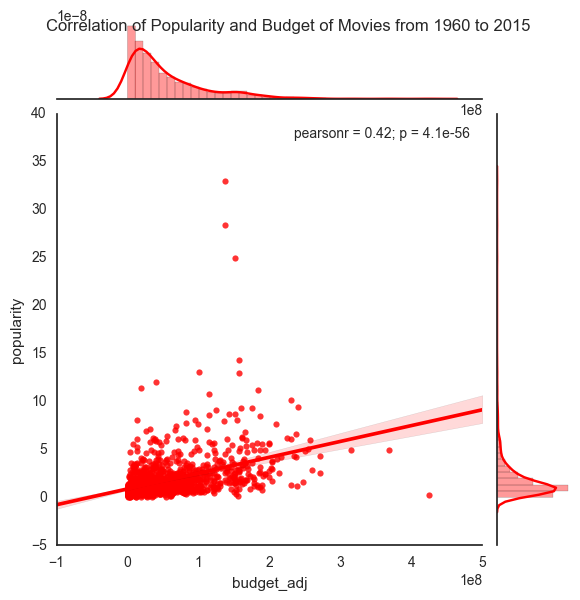

In [12]:
# Use jointplot to show correlation of popularity and budget_adj
pop_budget_map = sns.jointplot(x="budget_adj", y="popularity", data=abs_non0_data, kind="reg", color='red')
pop_budget_map.fig.suptitle('Correlation of Popularity and Budget of Movies from 1960 to 2015')

**Conclusion:** Most movies shows a budgets below 0.2 billion dollars, and below 5 popularity. But there are some exceptions, which have a high popularity but not a high budget; also there are some exceptions, wich have a high budget but not a high popularity. Even though the pearson r value gives 0.42, the correlation mainly reside within 0.2 billion, where higher budget shows a higher popularity.

#### Popularity with revenue_adj

This graph was made from the abs_non0_data, where the 0 entries in budget_adj and revenue_adj were removed for a better reliability.

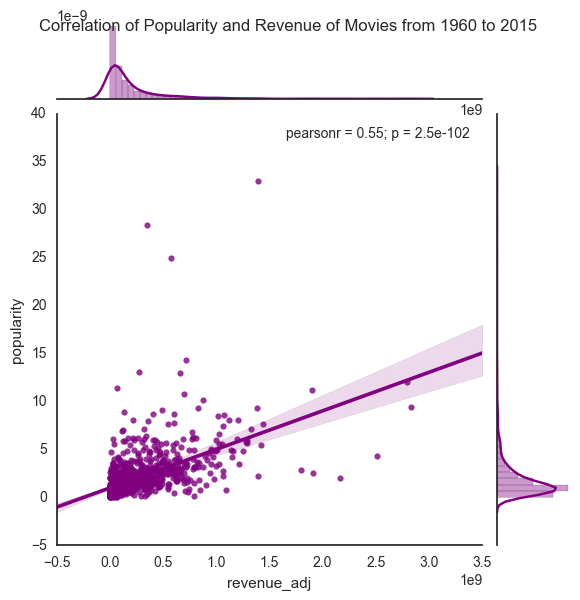

In [13]:
# Use jointplot to show correlation of popularity and revenue_adj
pop_revenue_map = sns.jointplot(x="revenue_adj", y="popularity", data=abs_non0_data, kind="reg", color='purple')
pop_revenue_map.fig.suptitle('Correlation of Popularity and Revenue of Movies from 1960 to 2015')

**Conclusion:** We can see a correlation with revenue and popularity. Movies with higher revenue usually have a higher popularity.

### 3. Further Exploration about Profit

#### Profit with release_year

*Below analysis was based on the abs_non0_data, where the 0 entries in budget_adj and revenue_adj were removed for a meaningful discussion.*

In [14]:
# Calculate profit, and insert as a new column
abs_non0_data['profit'] = abs_non0_data['revenue_adj'] - abs_non0_data['budget_adj'] # profit = revenue - budget
abs_non0_data['profit_boolean'] = abs_non0_data['profit'] > 0 # whether a movie is profitable, store boolean in a new column

In [15]:
# Check new columns
abs_non0_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_boolean
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,True
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,True
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,True
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,True
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,True


In [16]:
# Group by release_year, calculate the mean for each year.
profit_mean_by_year = abs_non0_data.groupby('release_year', as_index=False)['profit'].mean()

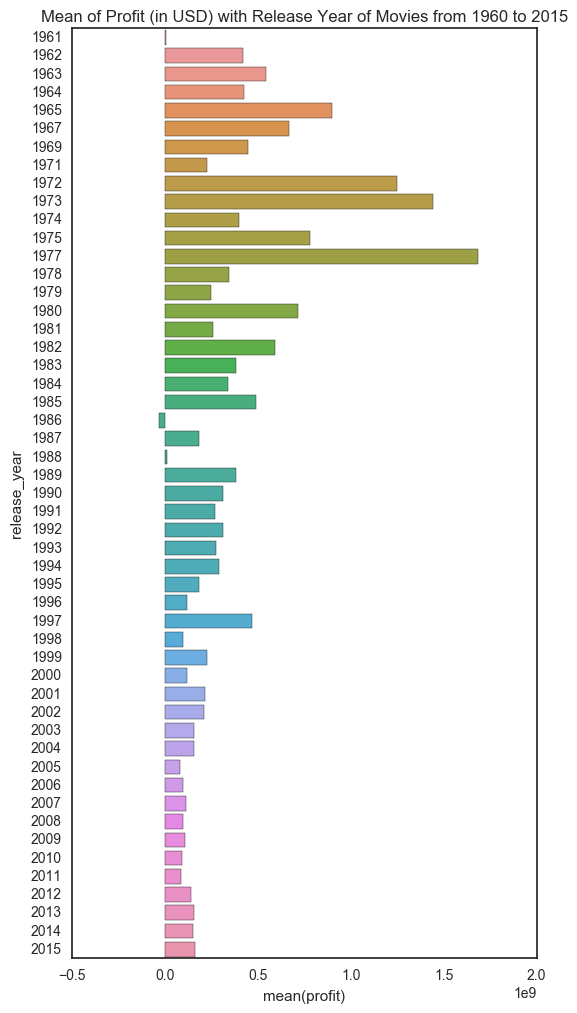

In [17]:
# Find out how profit correlates with release year.
plt.figure(figsize = (6,12))
yearly_profit = sns.barplot(x='profit',y='release_year', data=profit_mean_by_year, orient='h').set_title(
    'Mean of Profit (in USD) with Release Year of Movies from 1960 to 2015')

**Conclusion:** Movies made more profits in the 60s and 70s of last centry, less profit was made these years.

#### Profit with genres

In [18]:
# Split the genres into list, store in new column
abs_non0_data['genres_list'] = abs_non0_data['genres'].str.split('|') # split by '|'
abs_non0_data.head() # Check new column

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_boolean,genres_list
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,True,"[Action, Adventure, Science Fiction, Thriller]"
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,True,"[Action, Adventure, Science Fiction, Thriller]"
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,True,"[Adventure, Science Fiction, Thriller]"
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,True,"[Action, Adventure, Science Fiction, Fantasy]"
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,True,"[Action, Crime, Thriller]"


In [19]:
# Create a set to store the unique genre keywords.
genre_type = set()
for each_element in abs_non0_data['genres_list']:
    for each_word in each_element:
        genre_type.add(each_word)
genre_type

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western'}

In [20]:
# Determine whether a movie contains a certain genre, stored boolean in individual column
for each_genre in genre_type:
    abs_non0_data[each_genre] = abs_non0_data['genres_list'].apply(lambda x:each_genre in x) 
    # if a certain genre in the genre_list, store the boolean in a new column (with the genre as the column name)

In [21]:
abs_non0_data.head() # Check new columns

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Animation,Music,Adventure,Foreign,Action,Comedy,Documentary,War,Thriller,Western
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,False,False,True,False,True,False,False,False,True,False
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,False,False,True,False,True,False,False,False,True,False
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,False,False,True,False,False,False,False,False,True,False
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,False,False,True,False,True,False,False,False,False,False
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,False,False,False,False,True,False,False,False,True,False


In [22]:
# get the mean budget/revenue/profit for each genre.
# If a movie contains multiple genres, it will be counted and calculated in multiple catagories.
mean_by_genre_df = pd.DataFrame() # new dataframe
for each_genre in genre_type:
    this_genre_only_df = abs_non0_data[abs_non0_data[each_genre]==True] # Temporary dataframe with only this genre
    new_series = this_genre_only_df[['budget_adj', 'revenue_adj', 'profit']].mean() 
    # Calculate the means of budget, revenue, and profit for this genre, stored in a series.
    mean_by_genre_df[each_genre] = new_series # Add this new series into the new dataframe.
mean_by_genre_df # Check this new dataframe

,Mystery,Romance,History,Family,Fantasy,Horror,Crime,Drama,Science Fiction,Animation,Music,Adventure,Foreign,Action,Comedy,Documentary,War,Thriller,Western
budget_adj,4.851889e+07,3.491463e+07,4.772297e+07,9.377351e+07,1.072719e+08,2.685093e+07,4.475748e+07,3.614623e+07,7.989701e+07,9.779904e+07,3.857540e+07,1.047826e+08,1500000.0,8.191679e+07,4.768908e+07,6.453233e+06,4.765660e+07,5.051968e+07,1.228728e+08
revenue_adj,1.511165e+08,1.278280e+08,1.130965e+08,3.550469e+08,4.041242e+08,1.216668e+08,1.283450e+08,1.165447e+08,3.146262e+08,3.646843e+08,1.407091e+08,4.348917e+08,187716.0,2.936619e+08,1.583057e+08,2.705940e+07,1.520990e+08,1.780985e+08,1.669903e+08
profit,1.025976e+08,9.291334e+07,6.537350e+07,2.612734e+08,2.968523e+08,9.481583e+07,8.358748e+07,8.039852e+07,2.347292e+08,2.668853e+08,1.021337e+08,3.301090e+08,-1312284.0,2.117451e+08,1.106166e+08,2.060617e+07,1.044424e+08,1.275788e+08,4.411753e+07


In [23]:
# For a better visulization in below graph, above dataframe was transposed and added a new genre column.
mean_by_genre_transpose_df = mean_by_genre_df.transpose()
mean_by_genre_transpose_df['genre'] = mean_by_genre_transpose_df.index
mean_by_genre_transpose_df # Check the new transposed dataframe

,budget_adj,revenue_adj,profit,genre
Mystery,4.851889e+07,1.511165e+08,1.025976e+08,Mystery
Romance,3.491463e+07,1.278280e+08,9.291334e+07,Romance
History,4.772297e+07,1.130965e+08,6.537350e+07,History
Family,9.377351e+07,3.550469e+08,2.612734e+08,Family
Fantasy,1.072719e+08,4.041242e+08,2.968523e+08,Fantasy
Horror,2.685093e+07,1.216668e+08,9.481583e+07,Horror
Crime,4.475748e+07,1.283450e+08,8.358748e+07,Crime
Drama,3.614623e+07,1.165447e+08,8.039852e+07,Drama
Science Fiction,7.989701e+07,3.146262e+08,2.347292e+08,Science Fiction
Animation,9.779904e+07,3.646843e+08,2.668853e+08,Animation


In [24]:
# Processing the data further for a better bar graph.
melted_mean_by_genre = pd.melt(mean_by_genre_transpose_df, id_vars='genre', var_name='item', value_name='dollars')
melted_mean_by_genre.head() # Check the new dataframe

,genre,item,dollars
0,Mystery,budget_adj,4.851889e+07
1,Romance,budget_adj,3.491463e+07
2,History,budget_adj,4.772297e+07
3,Family,budget_adj,9.377351e+07
4,Fantasy,budget_adj,1.072719e+08


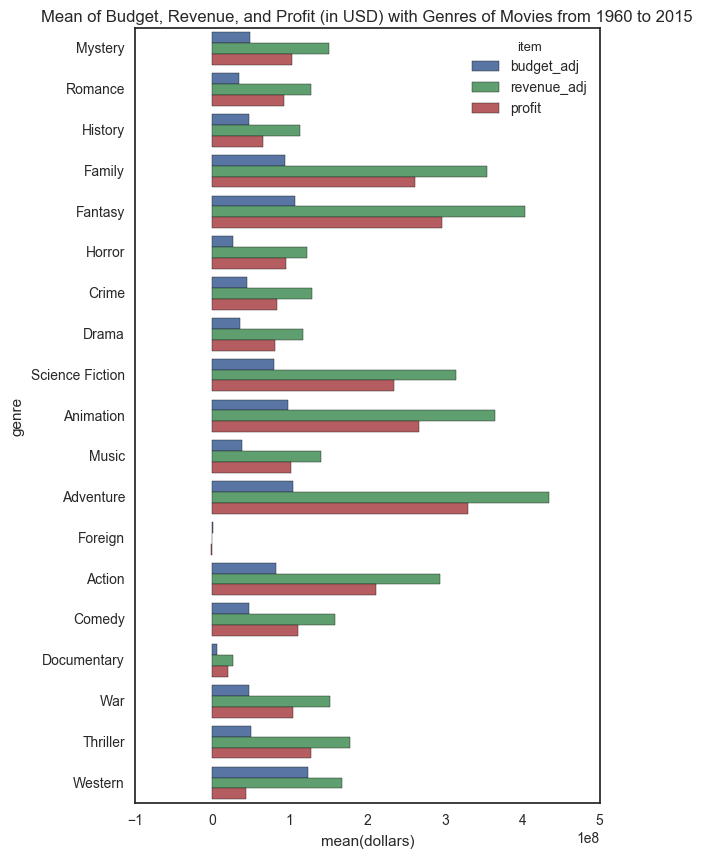

In [25]:
# By bar plot, check correlation of budget, revenue, and profit with genres.
plt.figure(figsize = (6,10))
profit_by_genre_plot = sns.barplot(x='dollars', y='genre', data=melted_mean_by_genre, hue='item', orient='h').set_title(
    'Mean of Budget, Revenue, and Profit (in USD) with Genres of Movies from 1960 to 2015')

**Conclusion:** From this bar graph, it's clear to us that budget, revenue, and profit showed similiar trends with different genres. Among those, Family, Fantasy, SciFi, Animation, Adventure, and Action movies showed higher budget, revenue, and profit; Foreign and Documentary showed lower budget, revenue, and profit.

## Conclusion and Prediction

**Summary of conclusion:**
1. Popularity had a high correlation with vote_count, budget, and revenue; a medium correlation with vote_average.
2. Movies in the last 60s and 70s earned more than these of today.
3. Family, fantasy, scifi, animation, adventure, and action movies showed higher budget, but also got higher revenue and earned higher profits.

**Prediction:**
For the future movies, to make the movie popular, it's possible to make family, fantasy, scifi, animation, adventure, and action movies. It's also promising to use a higher budget to get a higher popularity.

**Clarification:** Without furthur investigation and more evidence, there is no way to conclude cause and effect reasoning solely from correlation explored in this project.

## Summary of Communication

I want to share three plots from this project.

First is the general correlation plot, it's easy to find out which one has a higher correlation with another one. The second is the profit change with year, which shows how the profit of movies changed with year. The third one is the profit by genre plot, which could give us guide on what genre will make more profits.

In [26]:
correlation_map
yearly_profit
profit_by_genre_plot

## Reference

[IMDB dataset analysis from Kaggle](https://www.kaggle.com/tanetboss/beginner-binary-classification-for-nice-movie)

[Seaborn](https://seaborn.pydata.org/)

[Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)

[Stack Overflow](https://stackoverflow.com/)

[Seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

[Remove rows with Flase](https://stackoverflow.com/questions/37213556/remove-rows-that-contain-false-in-a-column-of-pandas-data-frame)

[Add index as a column](https://stackoverflow.com/questions/12168648/pandas-python-how-to-add-column-to-dataframe-for-index)

[Pandas.melt](https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots)